<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together.

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Dense, Activation,Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.callbacks import ReduceLROnPlateau

import itertools

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,\
                                    HalvingGridSearchCV,\
                                    RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,\
                                  OneHotEncoder
from sklearn.compose import ColumnTransformer
#from livelossplot import PlotLossesKerasTF

In [3]:
from PIL import Image
import cv2
from collections import Counter,defaultdict
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p "/content/drive/MyDrive/Deep Learning/Proje1/cat_dog_data"

In [ ]:
!unzip -q "/content/drive/MyDrive/Deep Learning/Proje1/cat_dog_data.zip" -d "/content/drive/MyDrive/Deep Learning/Proje1/cat_dog_data"

In [5]:
train_dir = '/content/drive/MyDrive/Deep Learning/Proje1/cat_dog_data/data/train'
val_dir   = '/content/drive/MyDrive/Deep Learning/Proje1/cat_dog_data/data/validation'
test_dir  = '/content/drive/MyDrive/Deep Learning/Proje1/cat_dog_data/data/test_sup'

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/Deep Learning/case study 1/Churn_Modelling.csv", index_col='RowNumber')
#df.head()

# Recognizing and Understanding Data

In [ ]:
# Set the path to one of your image folders
img_path = "/content/drive/MyDrive/Deep Learning/Proje1/cat_dog_data/data/train/cat"
sample_img = os.listdir(img_path)[0]  # take the first image file
img = Image.open(os.path.join(img_path, sample_img))

print("Original size:", img.size)  # Output format: (width, height)

In [ ]:
img = cv2.imread(os.path.join(img_path, sample_img))
print("Original size:", img.shape)  # Output format: (height, width, channels)

In [ ]:
sizes = []
for fname in os.listdir(img_path):
    img = Image.open(os.path.join(img_path, fname))
    sizes.append(img.size)

from collections import Counter
print("Most common size:", Counter(sizes).most_common(1))

In [ ]:
# Set your dataset base path
#base_path = "/content/drive/MyDrive/Deep Learning/Proje1/cat_dog_data/data"

# Subfolders to scan
subfolders = ['train/cat', 'train/dog', 'validation/cat', 'validation/dog', 'test']

# Dictionary to hold (width, height, channels) and corresponding file paths
size_to_files = defaultdict(list)

# Loop over all images
for sub in subfolders:
    folder = os.path.join(base_path, sub)
    if not os.path.exists(folder):
        print(f"Skipping: {folder}")
        continue

    for fname in os.listdir(folder):
        # only process image files
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(folder, fname)
        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')  # ensure 3 channels
                shape = (img.width, img.height, len(img.getbands()))
                size_to_files[shape].append(img_path)
        except Exception as e:
            print(f"⚠️ Skipped {img_path}: {e}")

# Show results
print(f"\n✅ Found {len(size_to_files)} unique (width, height, channels) combinations.\n")

for shape, files in size_to_files.items():
    print(f"📏 Shape {shape} → {len(files)} images")
    for path in files:
        print(f"   - {path}")
    print()

In [ ]:
folder = "/content/drive/MyDrive/Deep Learning/Proje1/cat_dog_data/train/cat"
if os.path.exists(folder):
    files = os.listdir(folder)
    image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Total files in folder: {len(files)}")
    print(f"Image files found: {len(image_files)}")
    print("First few image files:", image_files[:5])
else:
    print("❌ Folder not found!")

In [ ]:
most_common_shape = Counter([s for s in size_to_files.keys()]).most_common(1)
print("Most common shape in your dataset:", most_common_shape)

**Let's take an example images from both train-cat and train-dog folders to observe process**

**Let's check how many images there are.**

**Let's decide on the final dimension of these images.**

# Data Preprocessing

## Defining Input Shape

## Scaling

**Let's check the images if they are needed to be scaled or not**

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [19]:
image_size=(128,128)

In [20]:
#Resize the image while keeping its aspect ratio. Add padding (black or white borders) to make the final shape square.
def resize_with_padding(image):
    return tf.image.resize_with_pad(image, image_size[0], image_size[1])

In [21]:
batch_size=32

In [22]:
# data augmentation for only train data
train_gen = ImageDataGenerator( rescale=1./255,
                                preprocessing_function=resize_with_padding,   #Resize the image while keeping its aspect ratio. Add padding (black or white borders) to make the final shape square.
                                rotation_range=10,         # up to 20 degree rotation
                                zoom_range=0.1,            # 20% zoom
                                width_shift_range=0.05,     # 20% width shift
                                height_shift_range=0.05,    # 20% height shift
                                shear_range=0.05,          # slight shear
                                horizontal_flip=True  #,      # ✅ cats/dogs can face both ways
                                #fill_mode='nearest'        # fill in missing pixels
                                )
val_gen   = ImageDataGenerator(rescale=1./255,preprocessing_function=resize_with_padding)
test_gen  = ImageDataGenerator(rescale=1./255,preprocessing_function=resize_with_padding)

In [23]:
train_data = train_gen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', seed=42)
val_data   = val_gen.flow_from_directory(val_dir, target_size=image_size, batch_size=batch_size, class_mode='binary',seed=42)


Found 17526 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.


In [ ]:
test_data  = test_gen.flow_from_directory(test_dir, target_size=image_size, batch_size=batch_size, class_mode=None,shuffle=False,seed=42)

Found 17526 images belonging to 2 classes.


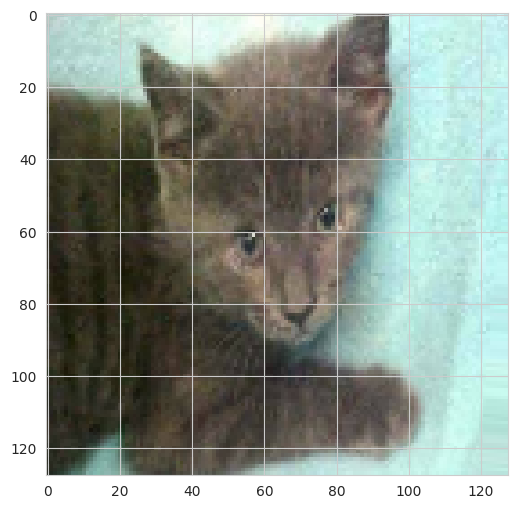

In [24]:
sample_batch = next(train_gen.flow_from_directory(train_dir, target_size=image_size, batch_size=1))
#sample_iter = iter(train_gen.flow_from_directory(train_dir, target_size=image_size, batch_size=1))
#sample_batch = next(sample_iter)
import matplotlib.pyplot as plt
plt.imshow(sample_batch[0][0])
plt.show()

# Modelling

In [41]:
model = Sequential()

#
model.add(InputLayer(shape=(150,150,3)))
#
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))



# fully connected
model.add(Flatten())
#model.add(Dense(128, activation = "relu"))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))

In [39]:
model = Sequential()

#
model.add(InputLayer(shape=(150,150,3)))

model.add(Conv2D(32, kernel_size = (5, 5), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(96, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))

In [25]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPool2D(2,2),
    Dropout(0.5),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(2,2),
    Dropout(0.5),

    GlobalAveragePooling2D(),  # Replaces Flatten()

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Define the optimizer
#optimizer = Adam()#(lr=0.001, beta_1=0.9, beta_2=0.999)
optimizer = Adam(learning_rate=1e-4)

In [27]:
# Compile the model
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

In [28]:
mixed_precision.set_global_policy('mixed_float16')

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,225 (110.25 KB)

 Trainable params: 28,033 (109.50 KB)

 Non-trainable params: 192 (768.00 B)

In [30]:
early_stop = EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)

In [31]:
epochs = 20  # for better result increase the epochs
#batch_size = 250

In [ ]:
history = model.fit(
    train_data,
    epochs = epochs,
    validation_data = val_data,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 13/548 ━━━━━━━━━━━━━━━━━━━━ 3:17:50 22s/step - accuracy: 0.6788 - loss: 0.7895

In [ ]:
# history = model.fit(
#     train_data,
#     steps_per_epoch = train_data.samples // train_data.batch_size,
#     epochs = epochs,
#     validation_data = val_data,ll
#     validation_steps = val_data.samples // val_data.batch_size,
#     callbacks=[early_stop]
# )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6367s 91s/step - accuracy: 0.5378 - loss: 0.8447 - val_accuracy: 0.5413 - val_loss: 0.6926
Epoch 2/20
 1/70 ━━━━━━━━━━━━━━━━━━━━ 1:34:53 83s/step - accuracy: 0.6680 - loss: 0.6715

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


70/70 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.6680 - loss: 0.6715 - val_accuracy: 0.5396 - val_loss: 0.6923
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6397s 91s/step - accuracy: 0.6460 - loss: 0.6609 - val_accuracy: 0.5267 - val_loss: 0.7775
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.6720 - loss: 0.5985 - val_accuracy: 0.5253 - val_loss: 0.7820
Epoch 5/20
46/70 ━━━━━━━━━━━━━━━━━━━━ 35:46 89s/step - accuracy: 0.7045 - loss: 0.5994

In [ ]:
model.metrics_names

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

In [ ]:
#history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
 #                             epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

# Evaluation on Test Data

# Prediction